In [24]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, units
import numpy as np

In [26]:
# Set time period
start = datetime(1973, 1, 1)
end = datetime(2023, 6, 1)

# Create Point for Vancouver, BC
nyc = Point(40.730610, -73.935242)

# Get daily data for 2018
data = Daily(nyc, start, end)
data = data.convert(units.imperial)
data = data.fetch()

daily_max = data.tmax

In [44]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1973-01-01,56.3,43.0,63.0,0.000,0.0,224.0,13.0,NaN,1015.9,NaN
1973-01-02,38.3,30.9,44.1,0.000,0.0,278.0,13.2,NaN,1022.9,NaN
1973-01-03,33.1,28.0,37.0,0.012,0.0,213.0,6.6,NaN,1032.0,NaN
1973-01-04,43.9,34.0,48.9,0.689,0.0,266.0,10.2,NaN,1013.5,NaN
1973-01-05,40.1,34.0,42.1,0.000,0.0,269.0,12.9,NaN,1013.1,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-28,67.8,60.1,78.1,0.000,NaN,218.0,3.5,NaN,1020.0,NaN
2023-05-29,69.1,61.0,79.0,0.000,NaN,71.0,6.8,NaN,1017.3,NaN
2023-05-30,61.9,55.4,71.1,0.000,NaN,68.0,5.4,NaN,1022.8,NaN


In [53]:
data['month'], data['day'] = data.index.month, data.index.day


In [54]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,month,day
time,,,,,,,,,,,,
1973-01-01,56.3,43.0,63.0,0.000,0.0,224.0,13.0,NaN,1015.9,NaN,1,1
1973-01-02,38.3,30.9,44.1,0.000,0.0,278.0,13.2,NaN,1022.9,NaN,1,2
1973-01-03,33.1,28.0,37.0,0.012,0.0,213.0,6.6,NaN,1032.0,NaN,1,3
1973-01-04,43.9,34.0,48.9,0.689,0.0,266.0,10.2,NaN,1013.5,NaN,1,4
1973-01-05,40.1,34.0,42.1,0.000,0.0,269.0,12.9,NaN,1013.1,NaN,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28,67.8,60.1,78.1,0.000,NaN,218.0,3.5,NaN,1020.0,NaN,5,28
2023-05-29,69.1,61.0,79.0,0.000,NaN,71.0,6.8,NaN,1017.3,NaN,5,29
2023-05-30,61.9,55.4,71.1,0.000,NaN,68.0,5.4,NaN,1022.8,NaN,5,30


In [59]:
daily_avg = data.tmax.groupby(by=[data.month, data.day]).mean()
daily_avg

time  time
1     1       43.086275
      2       42.513725
      3       39.762745
      4       40.827451
      5       40.178431
                ...    
12    27      40.298000
      28      43.618000
      29      42.878000
      30      41.614000
      31      41.784000
Name: tmax, Length: 366, dtype: float64

<AxesSubplot:xlabel='time,time'>

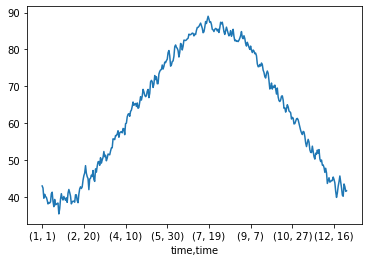

In [60]:
daily_avg.plot()